# Togo Solar Data - Complete EDA

In [1]:
# Togo Solar Data - Complete EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully for Togo analysis!")

✅ Libraries imported successfully for Togo analysis!


In [3]:
# Load Togo data
df = pd.read_csv('../data/togo-dapaong_qc.csv')

print("=== TOGO DATA LOADED ===")
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 3 rows:")
df.head(3)

=== TOGO DATA LOADED ===
Dataset Shape: (525600, 19)
Columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']

First 3 rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN


In [4]:
# Data Overview
print("=== DATA OVERVIEW ===")
print("Data Types:")
print(df.dtypes)
print("\nDataset Info:")
df.info()

# Missing Values Analysis
print("\n=== MISSING VALUES ANALYSIS ===")
missing_data = df.isna().sum()
missing_percent = (missing_data / len(df)) * 100
missing_report = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_report[missing_report['Missing Count'] > 0]

=== DATA OVERVIEW ===
Data Types:
Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null 

,Missing Count,Missing Percentage
Comments,525600,100.0


In [5]:
# Summary Statistics
print("=== SUMMARY STATISTICS ===")
df.describe()

=== SUMMARY STATISTICS ===


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [6]:
# Outlier Detection using Z-score
print("=== OUTLIER DETECTION ===")

def detect_outliers_zscore(data, columns, threshold=3):
    outliers = {}
    for col in columns:
        if data[col].dtype in ['float64', 'int64']:
            z_scores = np.abs(stats.zscore(data[col].dropna()))
            outliers[col] = np.sum(z_scores > threshold)
    return outliers

key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb']
outliers_report = detect_outliers_zscore(df, key_columns)

print("Outliers detected (|Z| > 3):")
for col, count in outliers_report.items():
    print(f"  {col}: {count} outliers ({count/len(df)*100:.2f}%)")

=== OUTLIER DETECTION ===
Outliers detected (|Z| > 3):
  GHI: 305 outliers (0.06%)
  DNI: 1062 outliers (0.20%)
  DHI: 3415 outliers (0.65%)
  ModA: 137 outliers (0.03%)
  ModB: 206 outliers (0.04%)
  WS: 3510 outliers (0.67%)
  WSgust: 3915 outliers (0.74%)
  Tamb: 0 outliers (0.00%)


In [7]:
# Data Cleaning
print("=== DATA CLEANING ===")
print(f"Original dataset shape: {df.shape}")

# Handle missing values
columns_to_impute = ['GHI', 'DNI', 'DHI', 'Tamb', 'WS', 'RH', 'BP']
for col in columns_to_impute:
    if col in df.columns and df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"✅ Filled missing values in {col} with median")

# Remove outliers for key columns
initial_count = len(df)
for col in key_columns:
    if col in df.columns and outliers_report.get(col, 0) > 0:
        z_scores = np.abs(stats.zscore(df[col]))
        df = df[z_scores < 3]
        
print(f"✅ Removed {initial_count - len(df)} outlier rows")
print(f"Final dataset shape: {df.shape}")

=== DATA CLEANING ===
Original dataset shape: (525600, 19)
✅ Removed 9995 outlier rows
Final dataset shape: (515605, 19)


=== TIME SERIES ANALYSIS ===


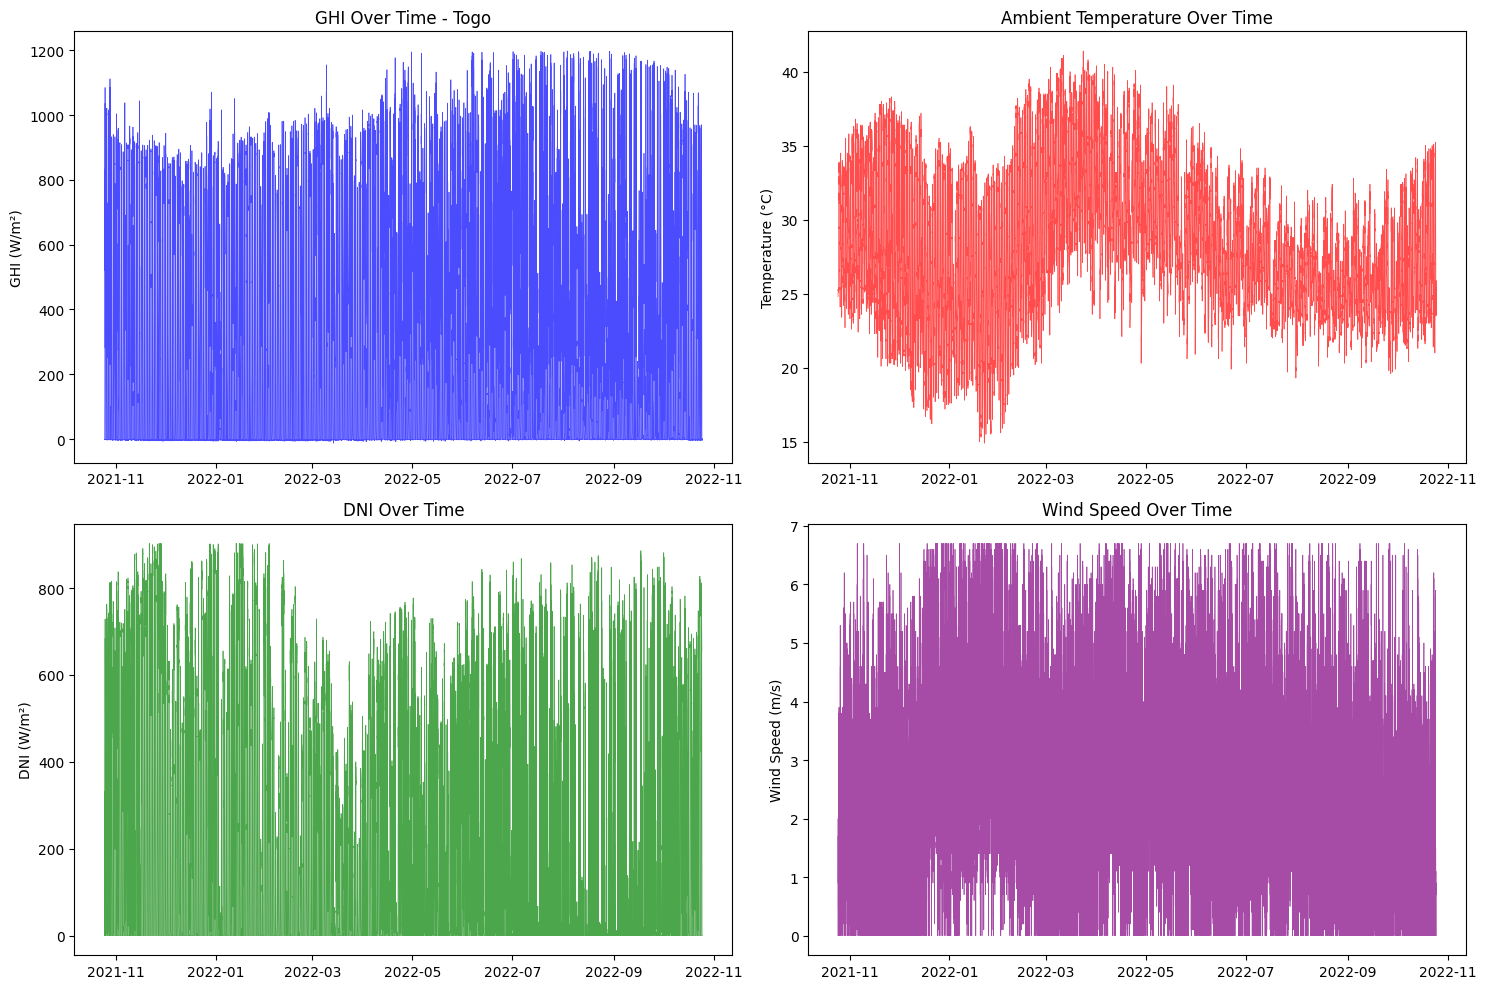

In [8]:
# Time Series Analysis
print("=== TIME SERIES ANALYSIS ===")

# Convert timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Month'] = df['Timestamp'].dt.month

# Create time series plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# GHI over time
axes[0,0].plot(df['Timestamp'], df['GHI'], alpha=0.7, linewidth=0.5, color='blue')
axes[0,0].set_title('GHI Over Time - Togo')
axes[0,0].set_ylabel('GHI (W/m²)')

# Temperature over time
axes[0,1].plot(df['Timestamp'], df['Tamb'], alpha=0.7, color='red', linewidth=0.5)
axes[0,1].set_title('Ambient Temperature Over Time')
axes[0,1].set_ylabel('Temperature (°C)')

# DNI over time
axes[1,0].plot(df['Timestamp'], df['DNI'], alpha=0.7, color='green', linewidth=0.5)
axes[1,0].set_title('DNI Over Time')
axes[1,0].set_ylabel('DNI (W/m²)')

# Wind Speed over time
axes[1,1].plot(df['Timestamp'], df['WS'], alpha=0.7, color='purple', linewidth=0.5)
axes[1,1].set_title('Wind Speed Over Time')
axes[1,1].set_ylabel('Wind Speed (m/s)')

plt.tight_layout()
plt.show()

=== DAILY PATTERNS ===


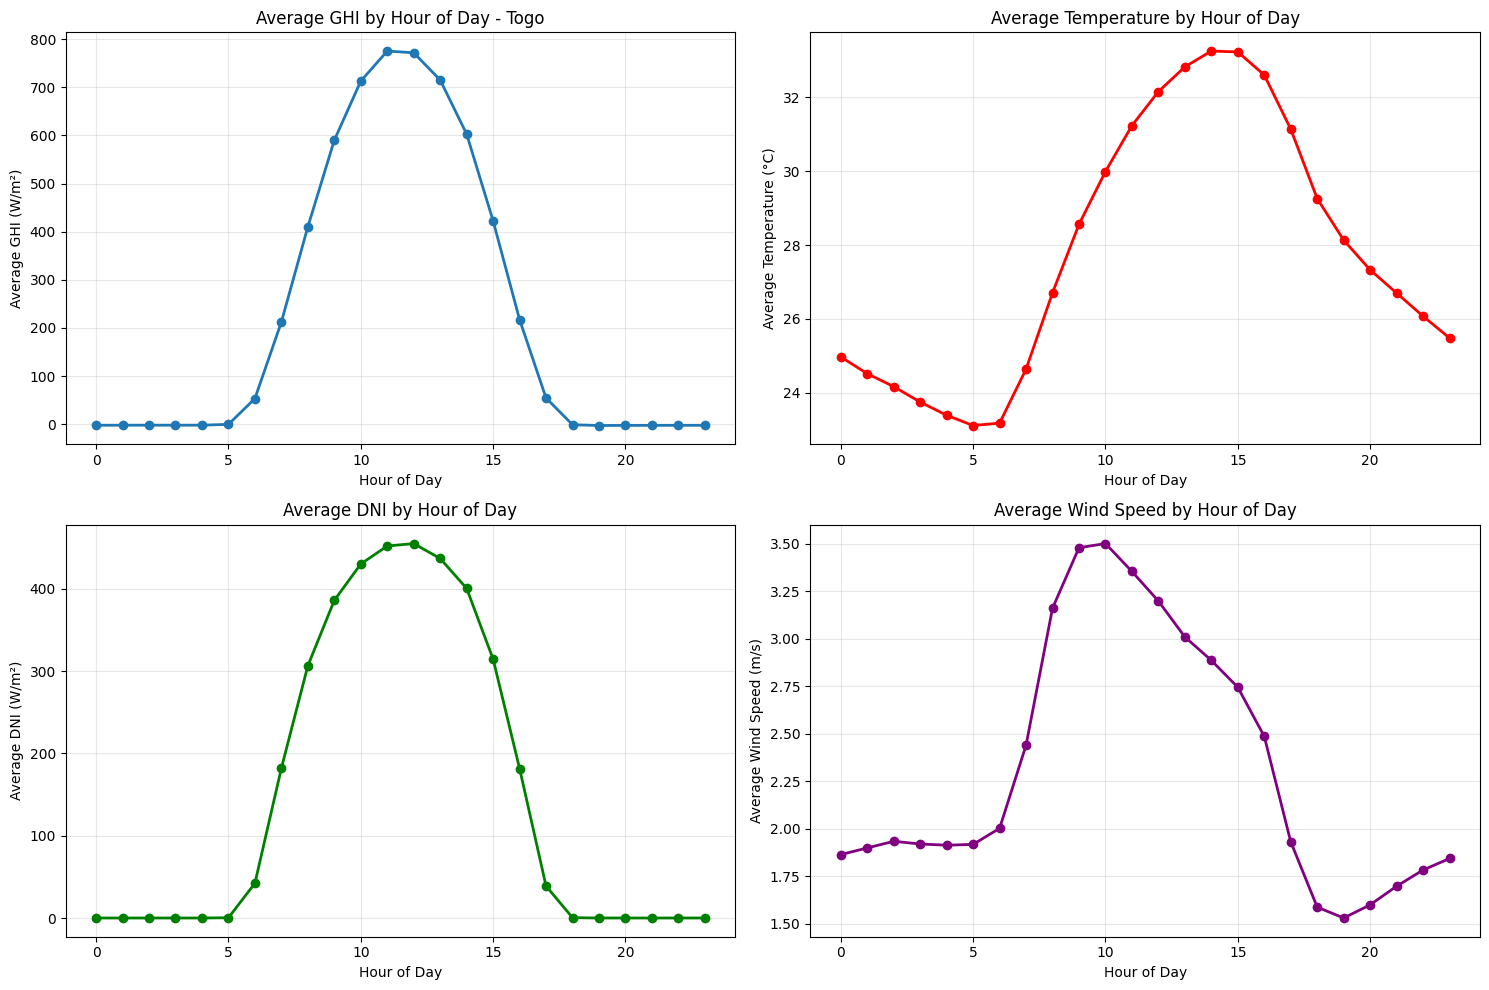

In [9]:
# Daily Patterns Analysis
print("=== DAILY PATTERNS ===")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# GHI by Hour
hourly_ghi = df.groupby('Hour')['GHI'].mean()
axes[0,0].plot(hourly_ghi.index, hourly_ghi.values, marker='o', linewidth=2)
axes[0,0].set_title('Average GHI by Hour of Day - Togo')
axes[0,0].set_xlabel('Hour of Day')
axes[0,0].set_ylabel('Average GHI (W/m²)')
axes[0,0].grid(True, alpha=0.3)

# Temperature by Hour
hourly_temp = df.groupby('Hour')['Tamb'].mean()
axes[0,1].plot(hourly_temp.index, hourly_temp.values, marker='o', color='red', linewidth=2)
axes[0,1].set_title('Average Temperature by Hour of Day')
axes[0,1].set_xlabel('Hour of Day')
axes[0,1].set_ylabel('Average Temperature (°C)')
axes[0,1].grid(True, alpha=0.3)

# DNI by Hour
hourly_dni = df.groupby('Hour')['DNI'].mean()
axes[1,0].plot(hourly_dni.index, hourly_dni.values, marker='o', color='green', linewidth=2)
axes[1,0].set_title('Average DNI by Hour of Day')
axes[1,0].set_xlabel('Hour of Day')
axes[1,0].set_ylabel('Average DNI (W/m²)')
axes[1,0].grid(True, alpha=0.3)

# Wind Speed by Hour
hourly_ws = df.groupby('Hour')['WS'].mean()
axes[1,1].plot(hourly_ws.index, hourly_ws.values, marker='o', color='purple', linewidth=2)
axes[1,1].set_title('Average Wind Speed by Hour of Day')
axes[1,1].set_xlabel('Hour of Day')
axes[1,1].set_ylabel('Average Wind Speed (m/s)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== CLEANING IMPACT ANALYSIS ===
Performance Metrics by Cleaning Status:


ModA              ModB               GHI
             mean      std     mean      std     mean
Cleaning                                             
0         218.710  311.397  212.368  302.168  223.197
1         529.266  238.036  527.499  234.585  569.911

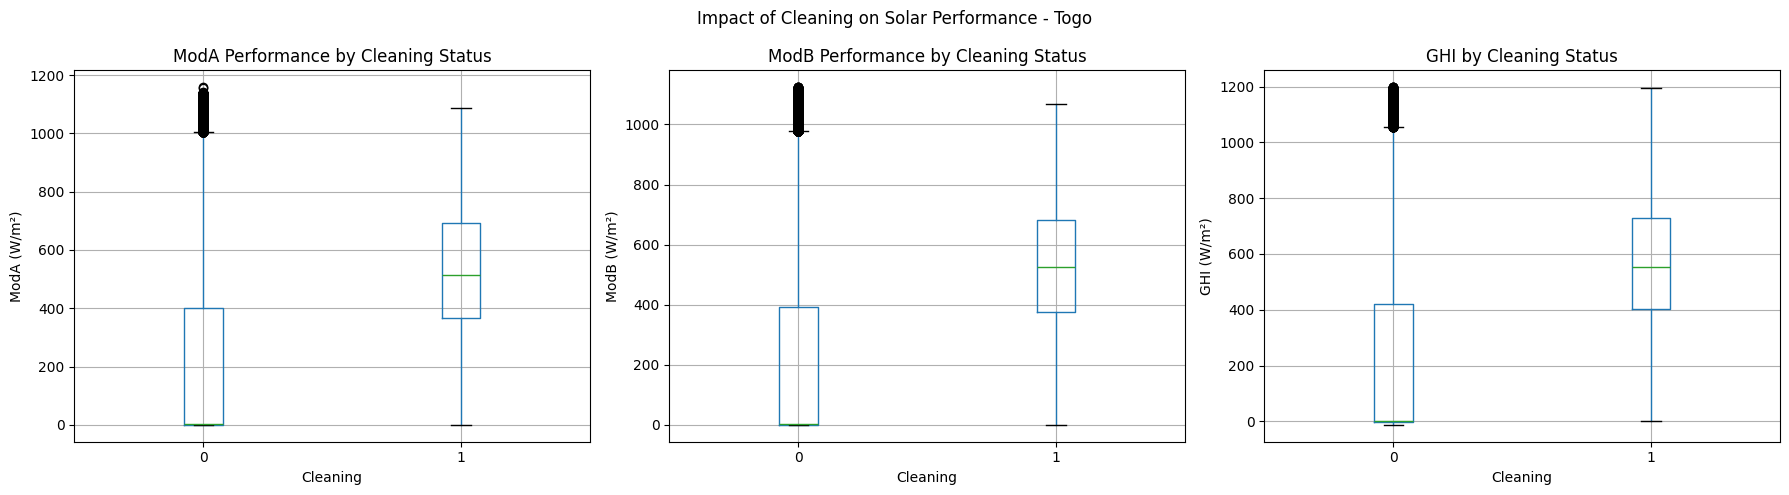

In [10]:
# Cleaning Impact Analysis
print("=== CLEANING IMPACT ANALYSIS ===")

if 'Cleaning' in df.columns:
    cleaning_impact = df.groupby('Cleaning').agg({
        'ModA': ['mean', 'std'],
        'ModB': ['mean', 'std'],
        'GHI': 'mean'
    }).round(3)
    
    print("Performance Metrics by Cleaning Status:")
    display(cleaning_impact)
    
    # Plot cleaning impact
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # ModA comparison
    df.boxplot(column='ModA', by='Cleaning', ax=axes[0])
    axes[0].set_title('ModA Performance by Cleaning Status')
    axes[0].set_ylabel('ModA (W/m²)')
    
    # ModB comparison
    df.boxplot(column='ModB', by='Cleaning', ax=axes[1])
    axes[1].set_title('ModB Performance by Cleaning Status')
    axes[1].set_ylabel('ModB (W/m²)')
    
    # GHI comparison
    df.boxplot(column='GHI', by='Cleaning', ax=axes[2])
    axes[2].set_title('GHI by Cleaning Status')
    axes[2].set_ylabel('GHI (W/m²)')
    
    plt.suptitle('Impact of Cleaning on Solar Performance - Togo')
    plt.tight_layout()
    plt.show()
else:
    print("No 'Cleaning' column found in dataset")

=== CORRELATION ANALYSIS ===


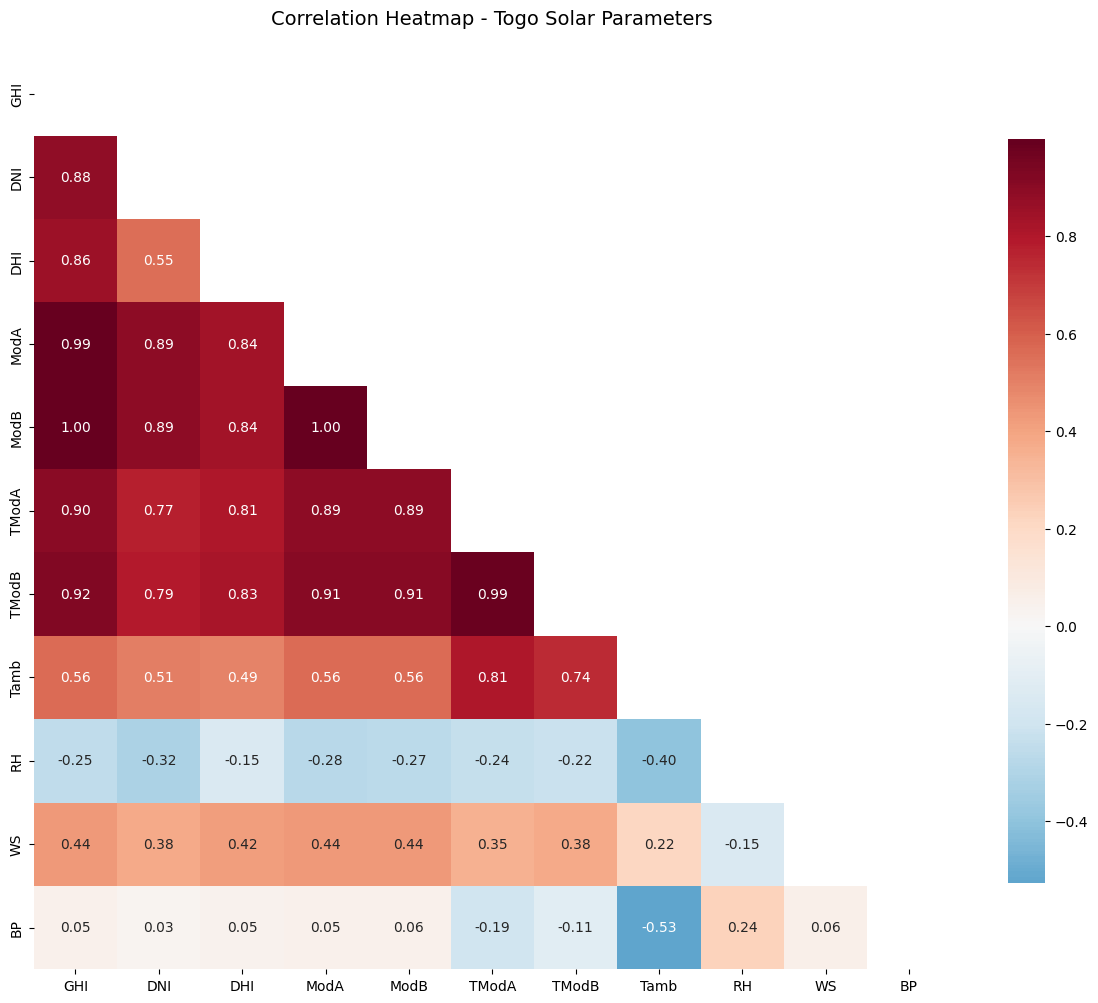


Top Correlations with GHI:
GHI      1.000000
ModB     0.995453
ModA     0.994910
TModB    0.921032
TModA    0.900698
DNI      0.883526
DHI      0.856316
Tamb     0.564368
WS       0.438596
BP       0.046713
Name: GHI, dtype: float64


In [11]:
# Correlation Analysis
print("=== CORRELATION ANALYSIS ===")

# Select relevant columns for correlation
corr_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'BP']
available_columns = [col for col in corr_columns if col in df.columns]

plt.figure(figsize=(12, 10))
correlation_matrix = df[available_columns].corr()

# Create heatmap with improved styling
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap - Togo Solar Parameters', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("\nTop Correlations with GHI:")
ghi_correlations = correlation_matrix['GHI'].sort_values(ascending=False)
print(ghi_correlations.head(10))

In [ ]:
# Scatter Plots for Relationships
print("=== RELATIONSHIP ANALYSIS ===")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# WS vs GHI
axes[0,0].scatter(df['WS'], df['GHI'], alpha=0.6, s=20, c=df['Tamb'], cmap='viridis')
axes[0,0].set_xlabel('Wind Speed (m/s)')
axes[0,0].set_ylabel('GHI (W/m²)')
axes[0,0].set_title('Wind Speed vs GHI (colored by Temperature) - Togo')
axes[0,0].grid(True, alpha=0.3)

# RH vs Tamb
axes[0,1].scatter(df['RH'], df['Tamb'], alpha=0.6, s=20, c=df['GHI'], cmap='plasma')
axes[0,1].set_xlabel('Relative Humidity (%)')
axes[0,1].set_ylabel('Ambient Temperature (°C)')
axes[0,1].set_title('Relative Humidity vs Temperature (colored by GHI)')
axes[0,1].grid(True, alpha=0.3)

# RH vs GHI
axes[1,0].scatter(df['RH'], df['GHI'], alpha=0.6, s=20, color='red')
axes[1,0].set_xlabel('Relative Humidity (%)')
axes[1,0].set_ylabel('GHI (W/m²)')
axes[1,0].set_title('Relative Humidity vs GHI')
axes[1,0].grid(True, alpha=0.3)

# Temperature vs GHI
axes[1,1].scatter(df['Tamb'], df['GHI'], alpha=0.6, s=20, c=df['RH'], cmap='coolwarm')
axes[1,1].set_xlabel('Ambient Temperature (°C)')
axes[1,1].set_ylabel('GHI (W/m²)')
axes[1,1].set_title('Temperature vs GHI (colored by Humidity)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== RELATIONSHIP ANALYSIS ===


In [ ]:
# Wind Analysis
print("=== WIND ANALYSIS ===")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Wind Speed Distribution
axes[0].hist(df['WS'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Wind Speed (m/s)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Wind Speed Distribution - Togo')
axes[0].grid(True, alpha=0.3)

# Wind Gust vs Regular Wind
axes[1].scatter(df['WS'], df['WSgust'], alpha=0.5, s=20, color='orange')
axes[1].set_xlabel('Wind Speed (m/s)')
axes[1].set_ylabel('Wind Gust (m/s)')
axes[1].set_title('Wind Speed vs Wind Gust')
axes[1].plot([df['WS'].min(), df['WS'].max()], [df['WS'].min(), df['WS'].max()], 'r--', alpha=0.8)
axes[1].grid(True, alpha=0.3)

# Wind Direction Analysis (if available)
if 'WD' in df.columns:
    axes[2].hist(df['WD'].dropna(), bins=36, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[2].set_xlabel('Wind Direction (°)')
    axes[2].set_ylabel('Frequency')
    axes[2].set_title('Wind Direction Distribution')
    axes[2].grid(True, alpha=0.3)
else:
    axes[2].text(0.5, 0.5, 'Wind Direction\nData Not Available', 
                horizontalalignment='center', verticalalignment='center',
                transform=axes[2].transAxes, fontsize=12)
    axes[2].set_title('Wind Direction Distribution')

plt.tight_layout()
plt.show()